In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, plot_roc_curve

In [3]:
# dataset importing
df = pd.read_csv('data.csv')

In [4]:
df1 = df.copy()

In [5]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Analyzing data

In [6]:
df.shape

(569, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

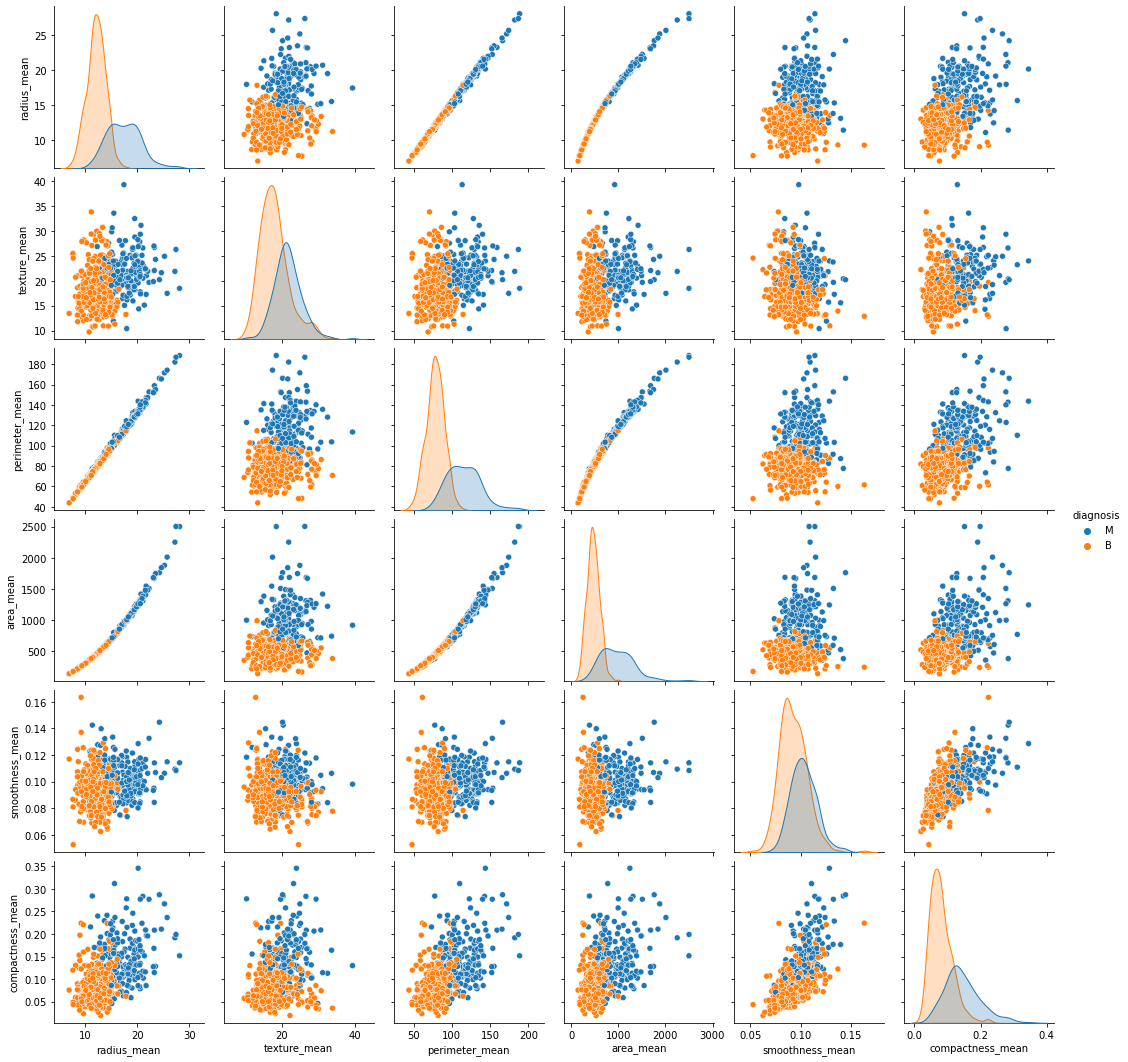

In [9]:
sns.pairplot(df, vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean'],
            hue='diagnosis');

In [10]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

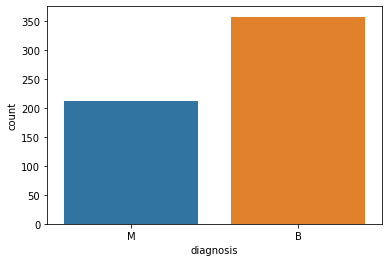

In [11]:
sns.countplot(df['diagnosis']);

# Removing unnecessary columns

In [12]:
df = df.drop(columns=['id', 'Unnamed: 32'])

In [13]:
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# Feature Scalling

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std = StandardScaler()
scaler = MinMaxScaler()

for column in df.columns:
    if not df.dtypes[column] == object:
        df[column] = std.fit_transform(df[[column]])


In [15]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Encoding for categorical data

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df['diagnosis'] = le.fit_transform(df[['diagnosis']]) 
# then we will get 1 for Malignant and 0 for Benign

In [18]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Defining features(x) and label(y)

In [19]:
x = df.drop('diagnosis', axis=1)

In [20]:
y = df[['diagnosis']]

In [21]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [22]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


# Spliting Traing and Test data

Traing 75% and Testing 25%

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [24]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
287,-0.351408,-1.435719,-0.415157,-0.395299,-1.907966,-1.270715,-0.831130,-0.959772,-1.732806,-0.990566,...,-0.548601,-1.650784,-0.591583,-0.533673,-1.587236,-0.887829,-0.736844,-0.928004,-0.957331,-0.819922
512,-0.206561,0.286311,-0.137124,-0.279260,1.013376,0.806556,0.699320,0.846065,1.111279,1.481735,...,0.029159,0.648570,0.179870,-0.063607,1.097274,0.835474,1.143785,1.377912,1.106957,1.493688
402,-0.331527,-0.232625,-0.320832,-0.368849,-1.626150,-0.480439,-0.605518,-0.776119,0.227751,-0.539768,...,-0.442989,-0.173791,-0.326191,-0.454742,-1.713045,-0.142909,-0.536308,-0.738889,0.495436,-0.635942
446,1.028901,2.033938,1.043388,0.929199,0.256887,0.512808,1.016961,0.877275,-0.360051,-0.515669,...,1.089422,2.094623,1.135996,0.978132,0.338913,0.775677,1.764105,1.254577,0.115258,0.377059
210,1.832661,0.663296,1.760097,1.806321,-0.388583,0.577243,0.944142,1.204343,-0.170202,-1.780172,...,1.443533,0.352195,1.520233,1.363115,-0.638627,0.240047,0.546493,1.178444,0.013337,-1.401788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.488033,-1.082004,-1.366651,-1.168611,0.104593,0.924055,-0.034392,-0.521016,0.329977,3.827870,...,-1.353531,-1.629614,-1.331463,-1.048038,-0.511503,-0.067845,-0.617866,-1.016318,-1.046309,1.355149
106,-0.706426,-0.223317,-0.691956,-0.689379,1.269571,-0.050051,-0.227236,-0.362899,-0.038768,0.340564,...,-0.648001,0.583433,-0.647878,-0.630885,1.597003,0.074651,0.072498,0.109537,-0.153294,0.389251
270,0.046211,-0.574704,-0.068748,-0.063392,-2.282296,-1.470464,-1.023849,-1.100607,-1.108494,-1.281175,...,-0.281464,-0.818652,-0.381891,-0.344521,-2.047074,-1.297121,-1.120358,-1.237560,-0.716282,-1.260478
435,-0.041833,0.076875,-0.034972,-0.157532,0.686015,0.169787,0.298817,0.405245,-0.520693,0.374586,...,0.159621,0.834212,0.197742,-0.019835,1.268234,0.652266,0.646282,1.036837,0.450138,1.194443


In [25]:
y_train

,diagnosis
287,0
512,1
402,0
446,1
210,1
...,...
71,0
106,0
270,0
435,1


# Machine Learning Models

#### As this is a classification problem, we will apply classification algorithms - knn, naive bayes, logistic regression, decision tree, svm, random forest, neural network

# KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [27]:
y_pred = knn.predict(x_test)

In [28]:
knn.score(x_test, y_test)

0.958041958041958

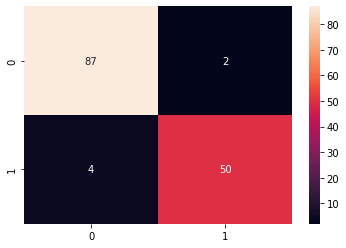

In [29]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True);

In [30]:
print(classification_report(y_test, y_pred))
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)
print('tp={}, fn={}, fp={}, tn={}'.format(tp, fn, fp, tn))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        89
           1       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

tp=87, fn=2, fp=4, tn=50


# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [32]:
y_pred = lr.predict(x_test)

In [33]:
y_test.tail()

,diagnosis
89,0
199,1
411,0
18,1
390,0


In [34]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [35]:
lr.score(x_test, y_test)

0.9790209790209791

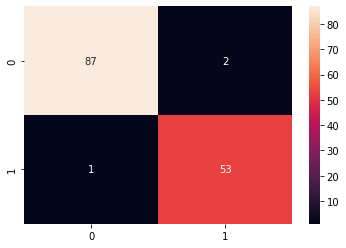

In [36]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True);

In [37]:
print(classification_report(y_test, y_pred))
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)
print('tp={}, fn={}, fp={}, tn={}'.format(tp, fn, fp, tn))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

tp=87, fn=2, fp=1, tn=53


# Decision Tree

In [38]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=7)

In [39]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [40]:
features = x.columns
features
targets = df1.diagnosis

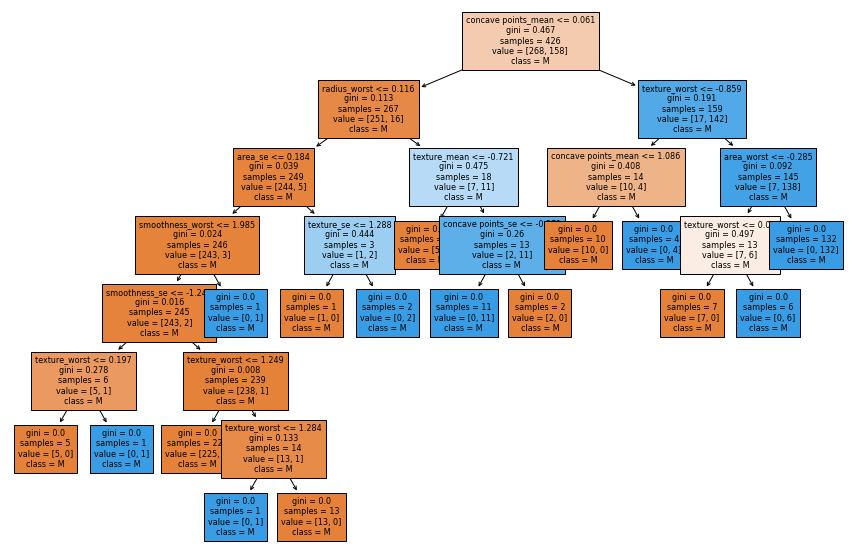

In [41]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt, fontsize=8, feature_names=features, class_names=targets, filled=True);

In [42]:
y_pred = dt.predict(x_test)

In [43]:
dt.score(x_test, y_test)

0.951048951048951

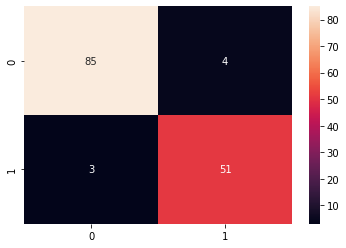

In [44]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True);

In [45]:
print(classification_report(y_test, y_pred))
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)
print('tp={}, fn={}, fp={}, tn={}'.format(tp, fn, fp, tn))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

tp=85, fn=4, fp=3, tn=51


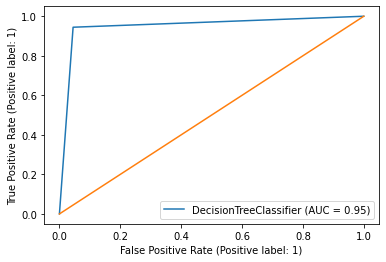

In [46]:
# Plotting ROC curve
plot_roc_curve(dt, x_test, y_test);
plt.plot([0,1], [0,1]);

# Naive Bayes

In [47]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

### BernoulliNB

In [48]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [49]:
y_pred = bnb.predict(x_test)

In [50]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [51]:
bnb.score(x_test, y_test)

0.972027972027972

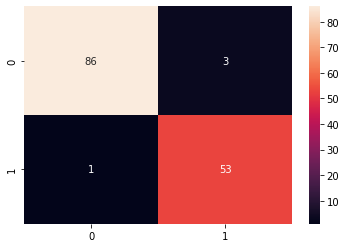

In [52]:
# Making the Confusion Matrix:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True);

In [53]:
print(classification_report(y_test, y_pred))
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)
print('tp={}, fn={}, fp={}, tn={}'.format(tp, fn, fp, tn))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        89
           1       0.95      0.98      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

tp=86, fn=3, fp=1, tn=53


### GaussianNB

In [54]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [55]:
y_pred = gnb.predict(x_test)

In [56]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [57]:
gnb.score(x_test, y_test)

0.951048951048951

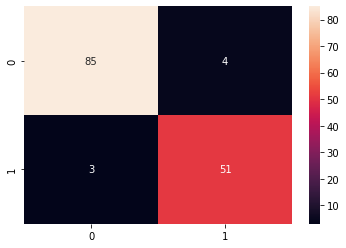

In [58]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True);

In [59]:
print(classification_report(y_test, y_pred))
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)
print('tp={}, fn={}, fp={}, tn={}'.format(tp, fn, fp, tn))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

tp=85, fn=4, fp=3, tn=51


# SVM

In [60]:
from sklearn.svm import SVC

In [61]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc.score(x_test, y_test)

0.972027972027972

In [62]:
svc = SVC(kernel='linear', random_state=42)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
svc.score(x_test, y_test)

0.9790209790209791

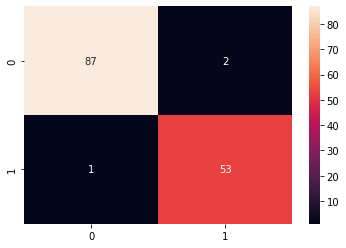

In [63]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True);

In [64]:
print(classification_report(y_test, y_pred))
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)
print('tp={}, fn={}, fp={}, tn={}'.format(tp, fn, fp, tn))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

tp=87, fn=2, fp=1, tn=53


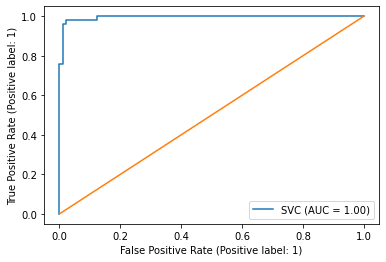

In [65]:
# Plotting ROC curve
plot_roc_curve(svc, x_test, y_test);
plt.plot([0,1], [0,1]);

# Ensemble

#### Voting, Bagging, stacking, Random Forest, Adaboost, GradientBoosting

In [66]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

### Voting

In [67]:
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
gnb_clf = GaussianNB()

voting_clf = VotingClassifier(
                            estimators=[('lr', log_clf), ('svc', svm_clf), ('rf', rf_clf), ('gnb', gnb_clf)],
                            voting='hard'
                            )
voting_clf.fit(x_train, y_train)
voting_clf.predict(x_test)
voting_clf.score(x_test, y_test)

0.965034965034965

In [68]:
# with soft voting
voting_clf_soft = VotingClassifier(
                            estimators=[('lr', log_clf), ('svc', svm_clf), ('rf', rf_clf), ('gnb', gnb_clf)] ,
                            voting='soft'
                            )
voting_clf_soft.fit(x_train, y_train)
y_pred = voting_clf_soft.predict(x_test)
voting_clf_soft.score(x_test, y_test)

0.972027972027972

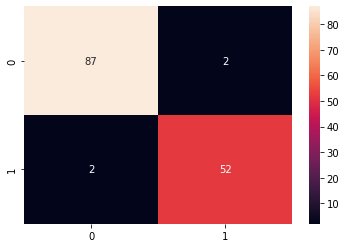

In [69]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True);

In [70]:
print(classification_report(y_test, y_pred))
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)
print('tp={}, fn={}, fp={}, tn={}'.format(tp, fn, fp, tn))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

tp=87, fn=2, fp=2, tn=52


### Bagging

In [71]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 100)
bag_clf.fit(x_train, y_train)
bag_clf.score(x_test, y_test)

0.965034965034965

In [72]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 500, n_jobs=-1, max_samples= 10, bootstrap=True)
bag_clf.fit(x_train, y_train)
bag_clf.score(x_test, y_test)

0.965034965034965

### Stacking

In [73]:
stack_clf = StackingClassifier(
                estimators=[('lr', log_clf), ('svc', svm_clf), ('rf', rf_clf), ('gnb', gnb_clf)],
                final_estimator= LogisticRegression()
                )
stack_clf.fit(x_train, y_train)
stack_clf.score(x_test, y_test)

0.972027972027972

### Random Forest

In [74]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test, y_test)

0.965034965034965

In [75]:
rf_clf = RandomForestClassifier(n_estimators= 100, max_leaf_nodes=16, n_jobs=-1, criterion='entropy', random_state=0)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test, y_test)

0.972027972027972

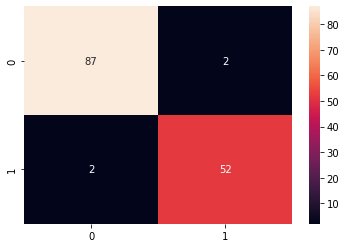

In [76]:
# Making the Confusion Matrix:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True);

In [77]:
print(classification_report(y_test, y_pred))
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)
print('tp={}, fn={}, fp={}, tn={}'.format(tp, fn, fp, tn))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

tp=87, fn=2, fp=2, tn=52


### Adaboost

In [78]:
ada_clf = AdaBoostClassifier(n_estimators= 100, learning_rate= 0.5)
ada_clf.fit(x_train, y_train)
ada_clf.score(x_test, y_test)

0.951048951048951

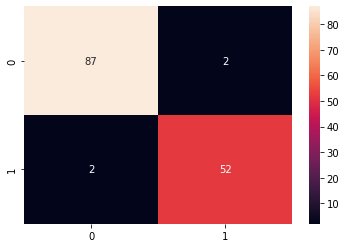

In [79]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True);

In [80]:
print(classification_report(y_test, y_pred))
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)
print('tp={}, fn={}, fp={}, tn={}'.format(tp, fn, fp, tn))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.96      0.96      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

tp=87, fn=2, fp=2, tn=52


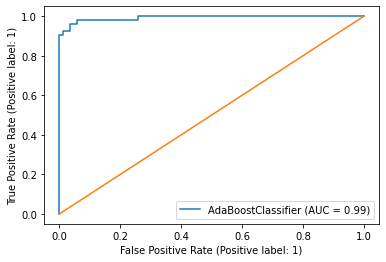

In [81]:
# Plotting ROC curve
plot_roc_curve(ada_clf, x_test, y_test);
plt.plot([0,1], [0,1]);

### GradientBoostingClassifier

In [82]:
grb_clf = GradientBoostingClassifier(n_estimators= 200, learning_rate=0.5, max_depth=4)
grb_clf.fit(x_train, y_train)
grb_clf.score(x_test, y_test)

0.958041958041958

# Neural Network

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [84]:
# Modeling
model = Sequential([
    Dense(128, input_dim=30, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [85]:
# Compiling
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01),
              loss = keras.losses.BinaryCrossentropy(), metrics = ['accuracy']
             )

In [86]:
# Fitting wuth no early stopping or callback
history = model.fit(x_train, y_train, verbose=1, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 1s 38ms/step - loss: 0.2872 - accuracy: 0.8756 - val_loss: 0.0809 - val_accuracy: 0.9650
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1294 - accuracy: 0.9624 - val_loss: 0.0588 - val_accuracy: 0.9790
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0831 - accuracy: 0.9812 - val_loss: 0.0554 - val_accuracy: 0.9860
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1009 - accuracy: 0.9648 - val_loss: 0.0600 - val_accuracy: 0.9790
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0505 - accuracy: 0.9789 - val_loss: 0.0957 - val_accuracy: 0.9720
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0508 - accuracy: 0.9812 - val_loss: 0.0865 - val_accuracy: 0.9790
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0504 - accuracy: 0.9859 - val_loss: 0.0771 - val_accuracy: 0.9790
Epoch 8/100
7/7 [=========

7/7 [==============================] - 0s 7ms/step - loss: 0.0186 - accuracy: 0.9953 - val_loss: 0.1968 - val_accuracy: 0.9790
Epoch 60/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0091 - accuracy: 0.9953 - val_loss: 0.2094 - val_accuracy: 0.9720
Epoch 61/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0127 - accuracy: 0.9930 - val_loss: 0.2119 - val_accuracy: 0.9790
Epoch 62/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0140 - accuracy: 0.9906 - val_loss: 0.2851 - val_accuracy: 0.9720
Epoch 63/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0139 - accuracy: 0.9953 - val_loss: 0.4138 - val_accuracy: 0.9650
Epoch 64/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.4333 - val_accuracy: 0.9650
Epoch 65/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.3728 - val_accuracy: 0.9650
Epoch 66/100
7/7 [===============

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


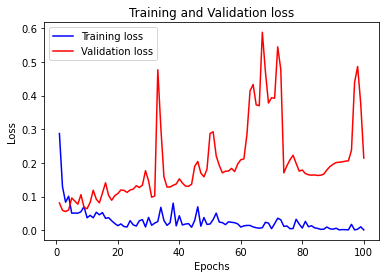

In [88]:
# Ploting training loss and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'b',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

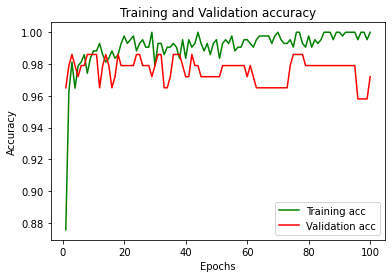

In [89]:
# Ploting training accuracy and validation accuracy at each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,'g',label = 'Training acc')
plt.plot(epochs,val_acc,'r',label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [90]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

class myCallback(tf.keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs={}):
   if(logs.get('accuracy')>0.985):
     print("\nReached 98.5% accuracy so cancelling training!")
     self.model.stop_training = True

callbacks = myCallback()

history = model.fit(x_train, y_train, verbose=1, epochs=100, batch_size=64, 
                    validation_data=(x_test, y_test), callbacks=[callbacks])

Epoch 1/100
1/7 [===>..........................] - ETA: 0s - loss: 3.7674e-04 - accuracy: 1.0000
Reached 98.5% accuracy so cancelling training!
7/7 [==============================] - 0s 14ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2037 - val_accuracy: 0.9790


In [91]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

5/5 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Confusion Matrix for ANN')

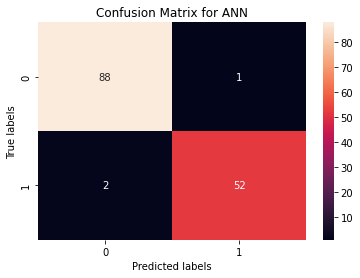

In [95]:
# Making the Confusion Matrix:
cm = confusion_matrix(y_test,y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot = True, ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for ANN')

In [96]:
print(classification_report(y_test, y_pred))
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)
print('tp={}, fn={}, fp={}, tn={}'.format(tp, fn, fp, tn))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

tp=88, fn=1, fp=2, tn=52
